Imports


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
def median_filter_manual(img, kernel_size):
    rows, cols = img.shape
    filtered_img = np.zeros_like(img)

    padding = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    for i in range(rows):
        for j in range(cols):
            # Corrected neighborhood extraction
            neighborhood = padded_img[i:i + kernel_size, j:j + kernel_size]
            filtered_img[i, j] = np.median(neighborhood)
    return filtered_img


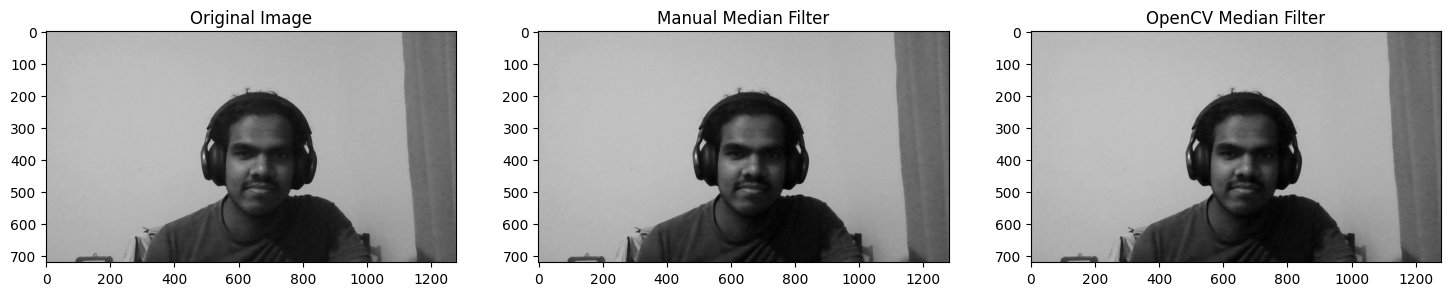

In [4]:
# Load the image in grayscale
img = cv2.imread('/content/WIN_20250109_20_45_19_Pro.jpg', cv2.IMREAD_GRAYSCALE)

# Apply manual median filter
manual_median = median_filter_manual(img, 3)

# Apply OpenCV's median filter for comparison
opencv_median = cv2.medianBlur(img, 3)

# Plotting the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Manual Median Filter")
plt.imshow(manual_median, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("OpenCV Median Filter")
plt.imshow(opencv_median, cmap='gray')

plt.show()

In [5]:
def edge_detection(img):
    # Create the Laplacian kernel
    kernel = np.array([
        [-1.414, -1, -1.414],
        [-1, 9.656, -1],
        [-1.414, -1, -1.414]
    ], dtype=np.float32)

    # Apply filter first
    updated = cv2.filter2D(img, -1, kernel)

    return updated

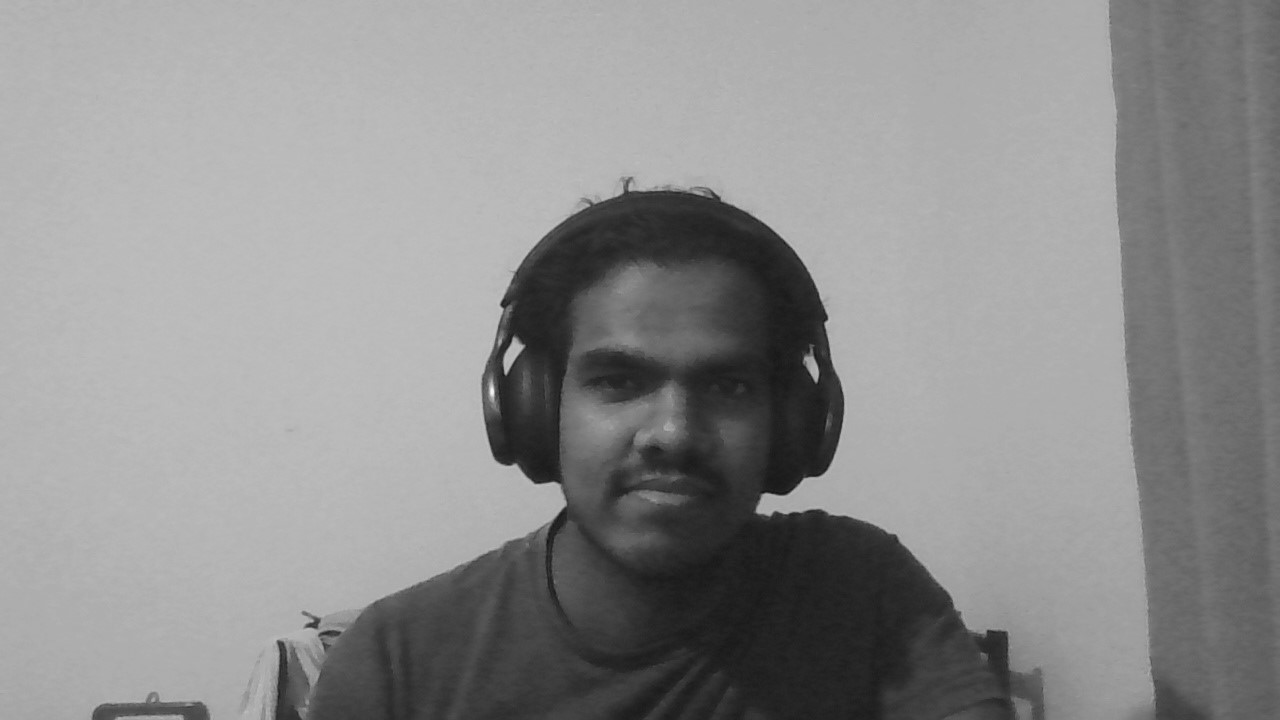

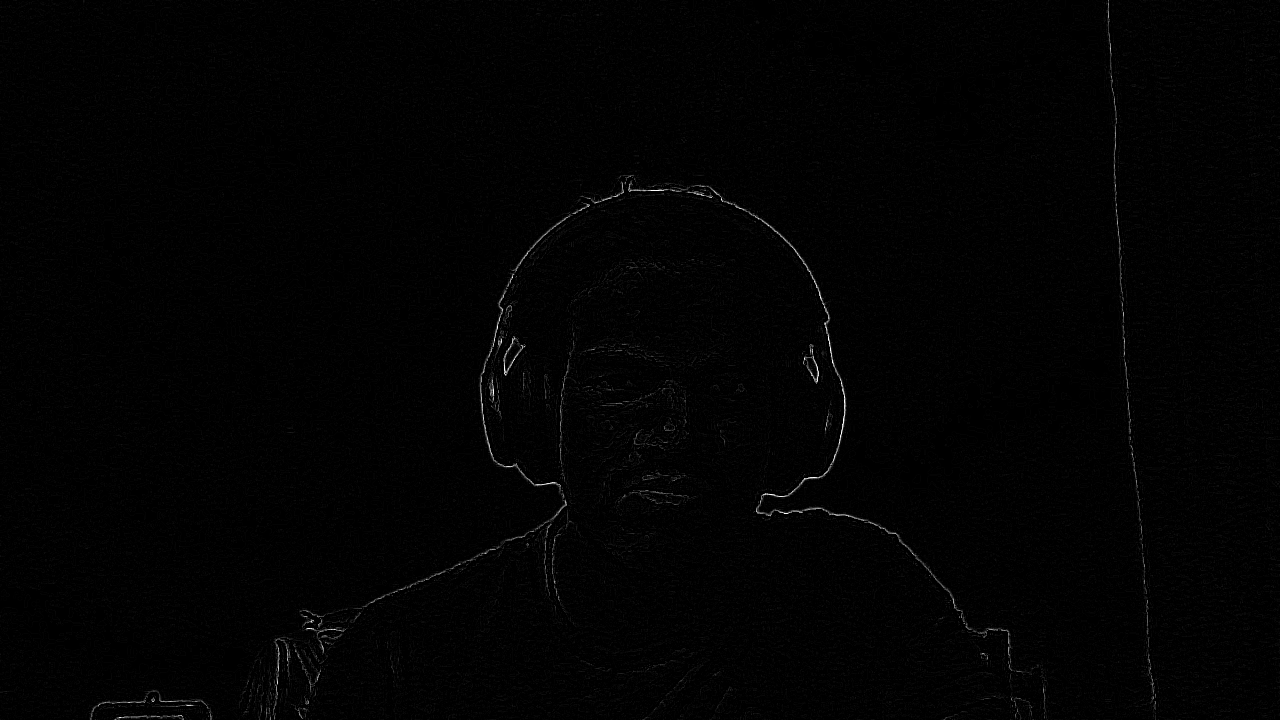

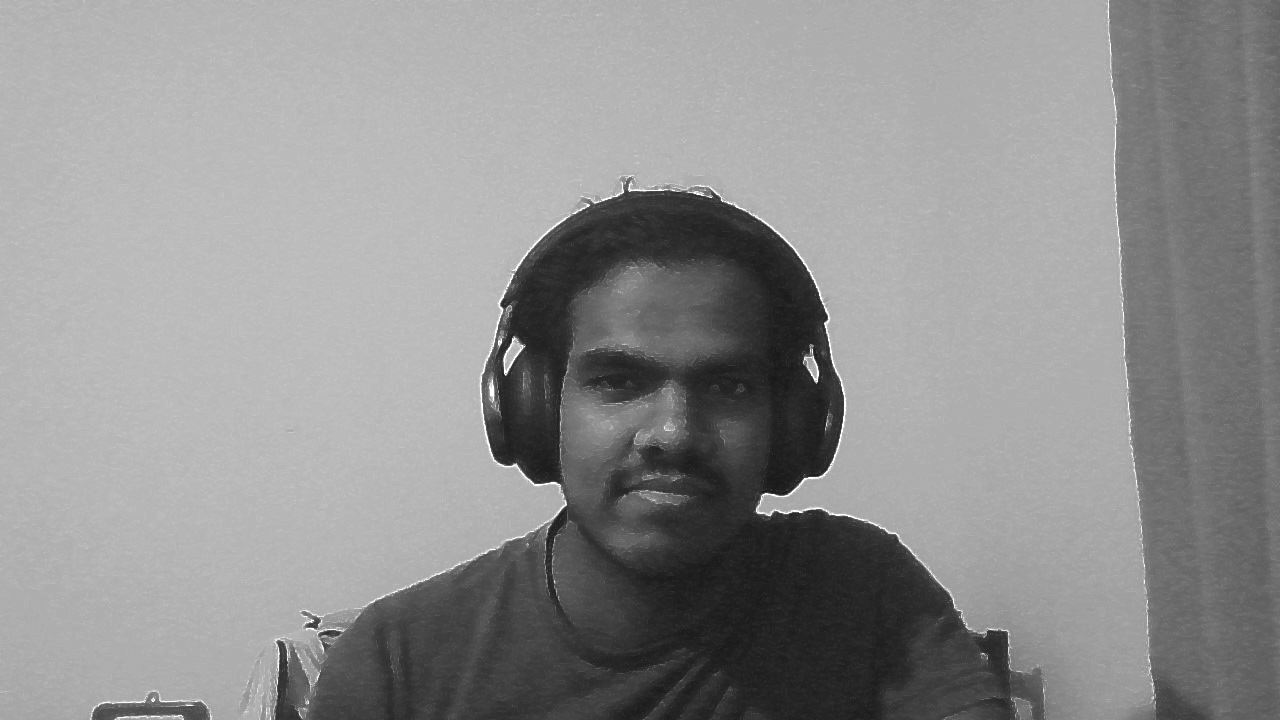

In [6]:
# Assuming 'img' is your grayscale image loaded as before
edge = edge_detection(opencv_median)

# Display the original and Laplacian-filtered images
cv2_imshow(img)
cv2_imshow(edge)

updated_image = opencv_median + 0.8*edge
cv2_imshow(updated_image)


Original Grayscale Image:


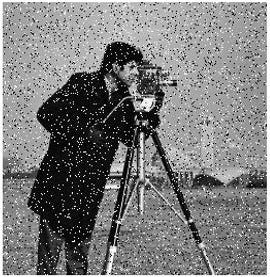

Blurred Image:


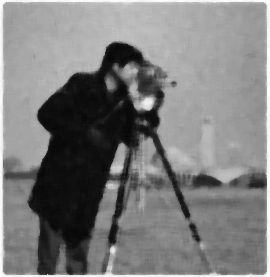

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use this for displaying images in Google Colab

def apply_median_blur(image_path, ksize=5):
    """
    Applies median blur to a grayscale image using OpenCV.

    Parameters:
    - image_path (str): Path to the input image.
    - ksize (int): Kernel size for the median filter. Must be an odd number.

    Returns:
    - original_gray_image (ndarray): The original grayscale image.
    - blurred_image (ndarray): The blurred image.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Cannot load image from path: {image_path}")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ensure kernel size is odd
    if ksize % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    # Apply median blur
    blurred_image = cv2.medianBlur(gray_image, ksize)

    return gray_image, blurred_image  # Return both the original grayscale and blurred images

# Example usage of the apply_median_blur function
input_image_path = "/content/image_with_salt_pepper_noise.jpg"  # Path to the input image

# Apply the blur function
original_gray_image_for_median, median_blurred_image = apply_median_blur(input_image_path, ksize=7)

# Display the original grayscale image
print("Original Grayscale Image:")
cv2_imshow(original_gray_image_for_median)

# Display the blurred image
print("Blurred Image:")
cv2_imshow(median_blurred_image)


Filtered Image:


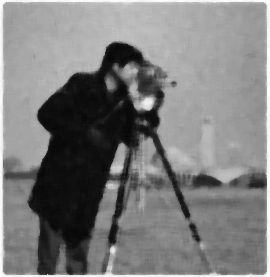

Edge Detected Image:


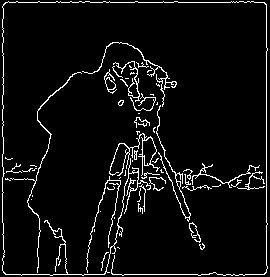

In [ ]:
def apply_edge_detection(image, lower_threshold=50, upper_threshold=150):
    """
    Applies Canny edge detection to an image.

    Parameters:
    - image (ndarray): Input grayscale image.
    - lower_threshold (int): Lower threshold for edge detection.
    - upper_threshold (int): Upper threshold for edge detection.

    Returns:
    - edges (ndarray): Binary image with detected edges.
    """
    # Apply Canny edge detection
    edges = cv2.Canny(image, lower_threshold, upper_threshold)
    return edges


# Apply edge detection on the filtered image
edge_image_median = apply_edge_detection(median_blurred_image, lower_threshold=50, upper_threshold=150)

# Display the filtered and edge-detected images
print("Filtered Image:")
cv2_imshow(median_blurred_image)

print("Edge Detected Image:")
cv2_imshow(edge_image_median)


Resulting Added Image:


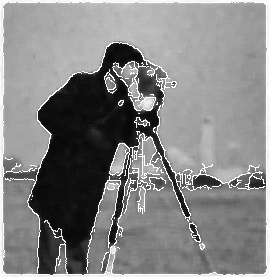

In [ ]:
def add_images_with_intensity_reduction(image1, image2, scale_factor=0.5):
    """
    Adds two images together using OpenCV after scaling the intensity of the second image.

    Parameters:
    - image1 (ndarray): The first image (as a NumPy array).
    - image2 (ndarray): The second image (as a NumPy array).
    - scale_factor (float): The factor by which to scale the pixel intensities of image2.

    Returns:
    - added_image (ndarray): The resulting image after addition.
    """
    if image1 is None or image2 is None:
        raise ValueError("One or both images are invalid.")

    # Resize images to the same dimensions if needed
    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Scale the pixel intensity of the second image
    image2_scaled = (image2 * scale_factor).astype(image1.dtype)

    # Add the two images
    added_image = cv2.add(image1, image2_scaled)

    return added_image

# Example usage
result_image = add_images_with_intensity_reduction(median_blurred_image, edge_image_median, scale_factor=0.8)

# Display the result
print("Resulting Added Image:")
cv2_imshow(result_image)


Original Grayscale Image:


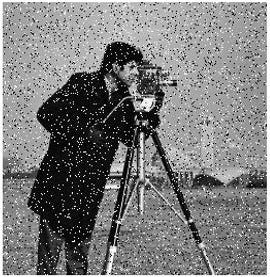

Blurred Image:


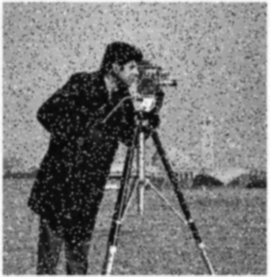

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Use this for displaying images in Google Colab

def apply_gaussian_blur(image_path, ksize=(5, 5), sigmaX=0):
    """
    Applies Gaussian blur to a grayscale image using OpenCV.

    Parameters:
    - image_path (str): Path to the input image.
    - ksize (tuple): Kernel size for the Gaussian filter (must be odd numbers).
    - sigmaX (float): Standard deviation in the X direction for the Gaussian kernel.

    Returns:
    - original_gray_image (ndarray): The original grayscale image.
    - blurred_image (ndarray): The blurred image.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Cannot load image from path: {image_path}")

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, ksize, sigmaX)

    return gray_image, blurred_image  # Return both the original grayscale and blurred images

# Example usage of the apply_gaussian_blur function
input_image_path = "/content/image_with_salt_pepper_noise.jpg"  # Path to the input image

# Apply the Gaussian blur function
original_gray_image_gaussian, blurred_image_gaussian = apply_gaussian_blur(input_image_path, ksize=(7, 7), sigmaX=1)

# Display the original grayscale image
print("Original Grayscale Image:")
cv2_imshow(original_gray_image_gaussian)

# Display the blurred image
print("Blurred Image:")
cv2_imshow(blurred_image_gaussian)


Filtered Image:


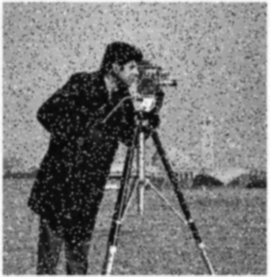

Edge Detected Image:


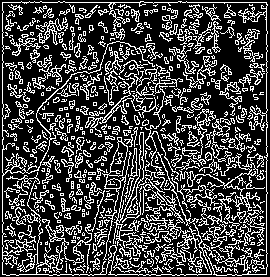

In [ ]:
# Apply edge detection on the filtered image
edge_image_gaussian = apply_edge_detection(blurred_image_gaussian, lower_threshold=50, upper_threshold=150)

# Display the filtered and edge-detected images
print("Filtered Image:")
cv2_imshow(blurred_image_gaussian)

print("Edge Detected Image:")
cv2_imshow(edge_image_gaussian)

Resulting Added Image:


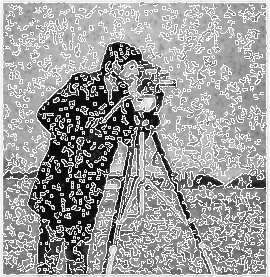

In [ ]:
# Example usage
result_image = add_images_with_intensity_reduction(blurred_image_gaussian, edge_image_gaussian, scale_factor=0.8)

# Display the result
print("Resulting Added Image:")
cv2_imshow(result_image)


Original Image:


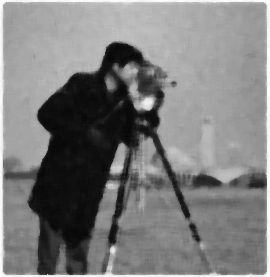

Wiener Filtered Image:


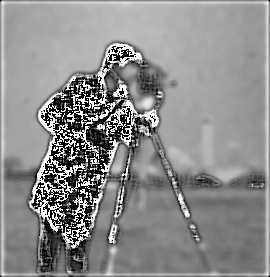

In [ ]:
import cv2
import numpy as np
from scipy.signal import wiener
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

def apply_wiener_filter(image, kernel_size=5):
    """
    Applies a Wiener filter to an image to reduce noise.

    Parameters:
    - image (ndarray): The input image (as a NumPy array).
    - kernel_size (int): The size of the filter kernel (default is 5).

    Returns:
    - filtered_image (ndarray): The resulting image after applying the Wiener filter.
    """
    if image is None:
        raise ValueError("Input image is invalid.")

    # Convert to grayscale if the image is not already grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Wiener filter
    filtered_image = wiener(image, mysize=kernel_size)

    # Clip values to ensure they remain in the valid range (0-255) for image display
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

    return filtered_image

# Example usage
filtered_image = apply_wiener_filter(median_blurred_image, kernel_size=5)

# Display the original and filtered images
print("Original Image:")
cv2_imshow(median_blurred_image)

print("Wiener Filtered Image:")
cv2_imshow(filtered_image)


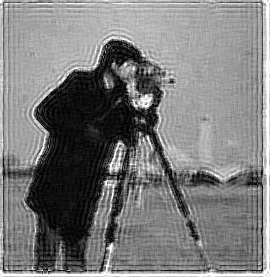

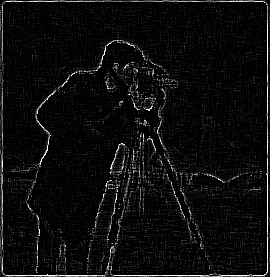

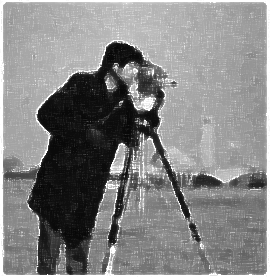

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def wiener_filter(image, kernel, K=0.01):
    image_fft = np.fft.fft2(image)
    kernel_fft = np.fft.fft2(kernel, s=image.shape)
    kernel_fft_conj = np.conj(kernel_fft)
    result_fft = (kernel_fft_conj / (np.abs(kernel_fft) ** 2 + K)) * image_fft
    result = np.fft.ifft2(result_fft)
    return np.abs(result)

# Load image and kernel
image = cv2.imread('/content/blur.jpg', 0)
kernel = np.ones((5, 5), np.float32) / 25  # Example kernel
restored_image = wiener_filter(median_blurred_image, kernel)

cv2_imshow(restored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Assuming 'img' is your grayscale image loaded as before
edge = edge_detection(median_blurred_image)
cv2_imshow(edge)

updated_image = median_blurred_image + 0.8*edge
cv2_imshow(updated_image)

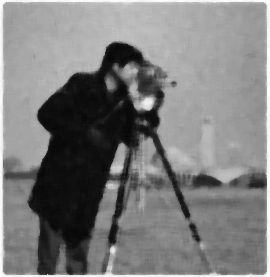

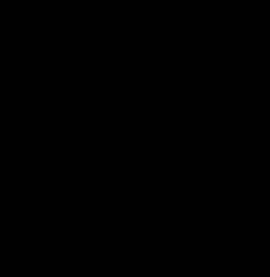

In [ ]:
from skimage import restoration
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For Colab users

# Load the blurred image
# image = cv2.imread('/content/blur.jpg', 0)

# Create a PSF (Point Spread Function) - example
psf = np.ones((3, 3)) / 9

# Apply Lucy-Richardson deconvolution
restored_image = restoration.richardson_lucy(median_blurred_image, psf, num_iter=2)

# Display images
cv2_imshow(median_blurred_image)  # Original blurred image
cv2_imshow(restored_image.astype('uint8'))  # Restored image

cv2.waitKey(0)
cv2.destroyAllWindows()


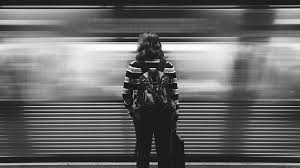

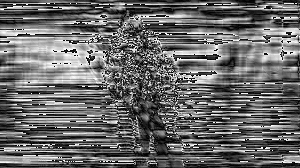

In [ ]:
def motion_blur_kernel(length, angle):
    """Create a motion blur kernel."""
    kernel = np.zeros((length, length))
    center = length // 2
    angle_rad = np.deg2rad(angle)
    for i in range(length):
        x = int(center + (i - center) * np.cos(angle_rad))
        y = int(center + (i - center) * np.sin(angle_rad))
        kernel[x, y] = 1
    return kernel / kernel.sum()

# Create motion blur kernel
kernel_length = 21
kernel_angle = 45  # Angle of motion in degrees
kernel = motion_blur_kernel(kernel_length, kernel_angle)

image = cv2.imread('/content/motionblur.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Wiener filter
restored_image = wiener_filter(image, kernel)

# Display result
cv2_imshow(image)
cv2_imshow(restored_image.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()
